In [149]:
from src.utils import data_load
import pandas as pd
from src.s3_utils import pandas_from_csv_s3
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from utils import get_survey_question, na_rate

In [150]:

data_survey = data_load(data_keys={'surveys'}, wave=7)['surveys']
survey_question_str = 'swollen'
data_edema = get_survey_question(data_survey, survey_question_str)
data_all = get_survey_question(data_survey, 'all')

In [151]:
data_survey_wave5 = data_load(data_keys={'surveys'}, wave=5)['surveys']
survey_question_str = 'swollen'
data_edema_wave5 = get_survey_question(data_survey_wave5, survey_question_str)

In [152]:
len(data_edema['user_id'].unique())

522

In [153]:
len(data_edema_wave5['user_id'].unique())

372

In [154]:
data_edema.columns

Index(['id', 'user_id', 'survey_id', 'title', 'event_date', 'from', 'to',
       'created_at', 'updated_at', 'question_id', 'question_text',
       'answer_text', 'record_id', 'date'],
      dtype='object')

In [155]:
survey_answer_len = []
for user in data_edema['user_id'].unique():
    survey_answer_len.append(len(data_all[data_all['user_id'] == user]))
    print(user, len(data_all[data_all['user_id'] == user]))

622 147
615 138
599 174
581 239
603 130
604 186
596 21
600 13
574 51
2230 72
2233 106
2234 103
2235 180
2257 177
2258 21
2259 86
2260 77
2261 104
2643 100
2645 106
2656 130
2654 140
2636 119
2664 87
2637 27
2650 108
2634 53
2508 15
2502 133
2528 106
2547 155
2530 130
2536 107
2524 24
2549 46
2518 142
2503 65
2516 129
2540 27
2504 99
2548 42
2514 154
2511 27
2546 109
2510 149
2509 44
2572 143
2551 152
2584 108
2583 132
2576 62
2565 124
2571 94
2564 86
2586 47
2578 144
2563 133
2582 8
2581 73
2574 43
2569 14
2575 107
2083 245
2080 186
2093 168
2094 91
2084 102
2085 69
2075 29
2091 67
2076 92
2092 3
2174 193
2183 177
2171 22
2159 219
2160 84
2169 167
2176 139
2158 58
2187 66
2167 112
2178 141
2166 102
2182 49
2173 22
2203 195
2226 178
2214 132
2197 49
2201 38
2212 99
2202 74
2209 73
2204 143
2225 117
2224 57
2223 146
2215 212
2498 144
2490 97
2480 108
2483 141
2485 160
2500 99
2482 48
2494 109
2484 34
2488 31
2491 19
2496 51
2489 99
2486 35
2481 17
2487 77
2453 68
2499 29
2120 73
2113 222

<AxesSubplot:ylabel='Count'>

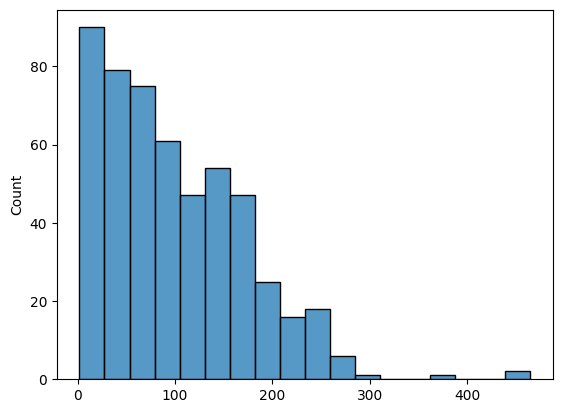

In [156]:
sns.histplot(survey_answer_len)

In [157]:
selected_user = 1400
len(data_edema[data_edema['user_id'] == selected_user][['answer_text', 'date']])


62

In [158]:

def fill_in_all_daily_data(selected_user):
    selected_data_all = data_all[data_all['user_id'] == selected_user][['user_id', 'answer_text', 'date']]
    selected_data_edema = data_edema[data_edema['user_id'] == selected_user][['user_id', 'answer_text', 'date']]
    selected_data_no_symptom = selected_data_all[~selected_data_all['date'].isin(selected_data_edema['date'])]
    selected_data_no_symptom['answer_text'] = 1
    selected_data_edema.answer_text = selected_data_edema.answer_text.astype(int)
    selected_data_combined = pd.concat([selected_data_no_symptom, selected_data_edema])

    selected_data_combined.date = selected_data_combined.date.astype("datetime64")

    date_range = pd.date_range(np.min(selected_data_combined['date']), np.max((selected_data_combined['date'])), freq='d')
    date_df = pd.DataFrame()
    date_df['date'] = date_range
    date_df['user_id'] = selected_user
    date_df['date'] = date_df['date'].astype("datetime64")

    selected_data_combined = pd.merge(date_df, selected_data_combined, how='left')
    selected_data_combined = selected_data_combined.replace("", np.nan)
    return selected_data_combined


In [159]:
user_data_lst = []
for user in data_edema['user_id'].unique():
    user_data_lst.append(fill_in_all_daily_data(user))

In [160]:
for u in user_data_lst:
    print(len(u))

245
195
244
317
280
292
127
38
51
182
210
180
200
213
21
197
181
209
149
147
139
141
151
133
149
143
152
19
161
158
159
153
144
147
157
153
91
153
158
157
153
159
52
158
159
155
158
159
155
155
153
154
155
155
85
155
155
96
147
150
119
155
297
271
216
175
264
178
37
292
254
33
243
244
132
238
163
248
252
139
233
221
264
212
232
123
199
210
224
179
63
224
235
95
237
216
210
218
226
163
162
158
162
161
158
155
159
158
68
123
161
164
105
61
160
161
156
124
309
49
287
272
188
162
234
177
251
162
226
283
240
151
280
45
197
194
202
210
208
193
187
28
212
196
31
154
151
152
28
153
154
116
147
141
152
151
154
151
89
136
151
65
153
153
154
151
154
11
287
272
275
168
270
97
248
285
52
52
204
273
45
158
89
253
302
184
210
83
41
271
317
68
169
253
163
166
234
292
248
230
273
250
201
92
166
255
256
256
254
176
114
283
275
89
273
261
229
150
201
276
188
172
202
306
239
186
179
318
255
261
221
194
194
194
188
166
187
181
191
196
194
170
89
219
453
273
117
115
374
105
31
181
442
225
239
108
280
168
18

<AxesSubplot:xlabel='date', ylabel='answer_text'>

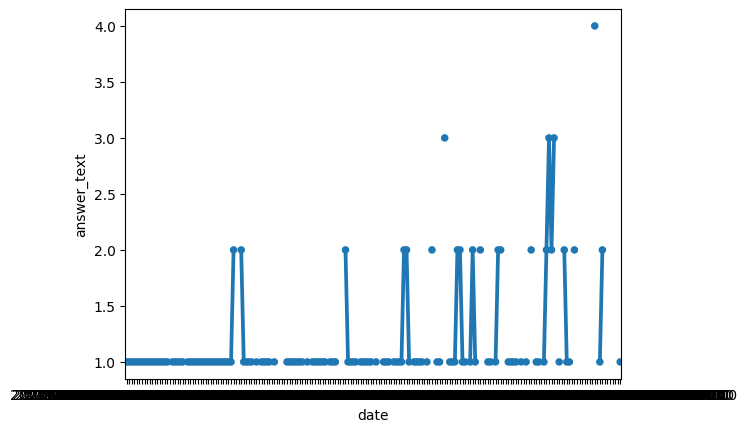

In [161]:
sns.pointplot(data=user_data_lst[1], x="date", y="answer_text", markers='.')


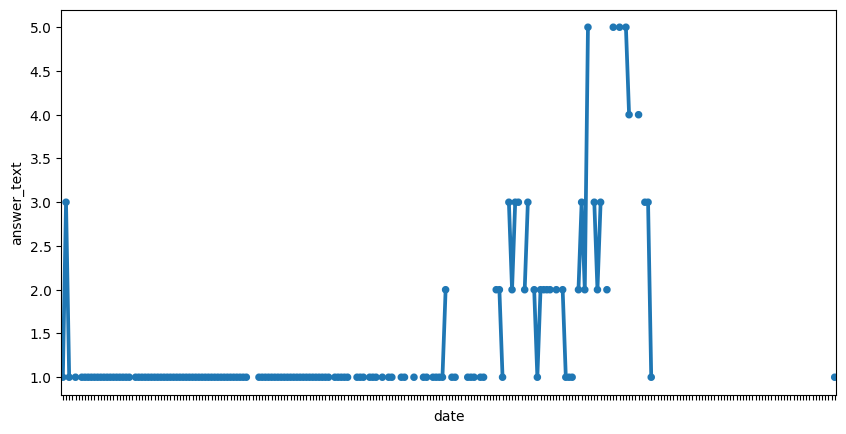

In [162]:
fig, ax = plt.subplots(figsize=(10, 5))

plot = sns.pointplot(data=user_data_lst[0], x="date", y="answer_text", markers='.')

ax.set_xticklabels([])

plt.show()

In [163]:
df = user_data_lst[0].copy()
df['edema_coarse_label'] = df.answer_text
df.loc[df["edema_coarse_label"] >= 2, "edema_coarse_label"] = 2
df.loc[df["edema_coarse_label"] == 1, "edema_coarse_label"] = 0
df

,date,user_id,answer_text,edema_coarse_label
0,2021-09-10,622,1.0,0.0
1,2021-09-11,622,3.0,2.0
2,2021-09-12,622,1.0,0.0
3,2021-09-13,622,NaN,NaN
4,2021-09-14,622,1.0,0.0
...,...,...,...,...
240,2022-05-08,622,NaN,NaN
241,2022-05-09,622,NaN,NaN
242,2022-05-10,622,NaN,NaN
243,2022-05-11,622,NaN,NaN


In [164]:
edema_days = df[df['edema_coarse_label'] == 2]['date']
pre_symptom_range = 3
for i in range(pre_symptom_range):
    df.loc[(df['date'].isin(edema_days-timedelta(days=i))) & (df['edema_coarse_label'] == 0), "edema_coarse_label"] = 1

In [165]:
df

,date,user_id,answer_text,edema_coarse_label
0,2021-09-10,622,1.0,1.0
1,2021-09-11,622,3.0,2.0
2,2021-09-12,622,1.0,0.0
3,2021-09-13,622,NaN,NaN
4,2021-09-14,622,1.0,0.0
...,...,...,...,...
240,2022-05-08,622,NaN,NaN
241,2022-05-09,622,NaN,NaN
242,2022-05-10,622,NaN,NaN
243,2022-05-11,622,NaN,NaN


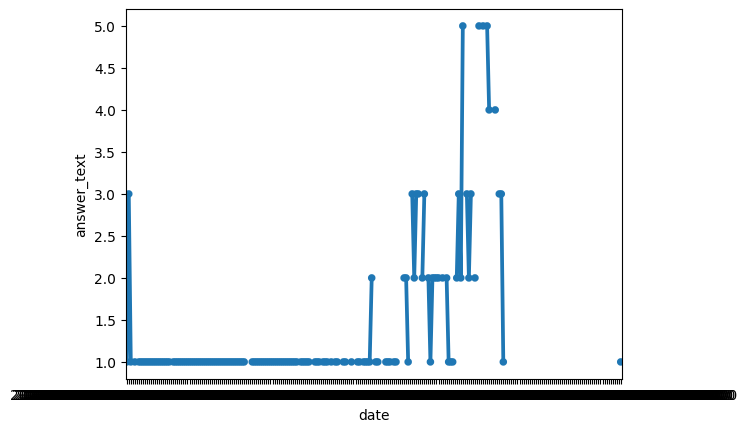

In [166]:
plot = sns.pointplot(data=df, x="date", y="answer_text", markers='.')

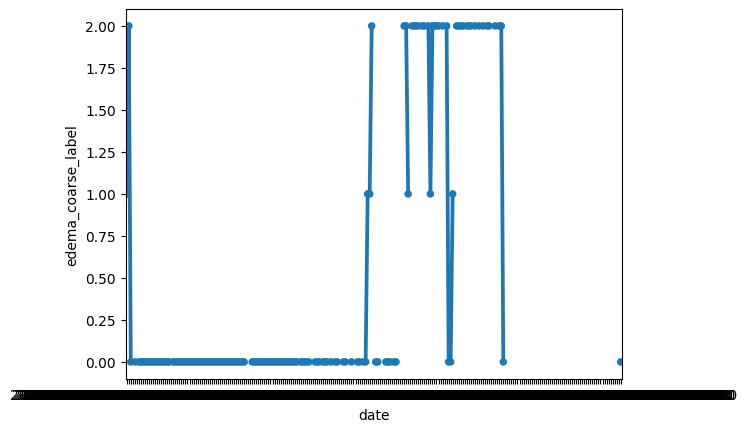

In [167]:
plot = sns.pointplot(data=df, x="date", y="edema_coarse_label", markers='.')

In [172]:
def create_coarse_label(df, pre_symptom_range=3):
    df['edema_coarse_label'] = df.answer_text
    df.loc[df["edema_coarse_label"] >= 2, "edema_coarse_label"] = 2
    df.loc[df["edema_coarse_label"] == 1, "edema_coarse_label"] = 0
    edema_days = df[df['edema_coarse_label'] == 2]['date']

    for i in range(1, pre_symptom_range + 1):
        df.loc[(df['date'].isin(edema_days-timedelta(days=i))) & (df['edema_coarse_label'] == 0), "edema_coarse_label"] = 1
    return df

coarse_label_lst = []

for df in user_data_lst:
    coarse_label_lst.append(create_coarse_label(df))

for df in coarse_label_lst:
    user_id = df['user_id'].unique()[0]
    df.to_csv(f"/mnt/results/edema_coarse_label/user_{user_id}_edema_coarse_label.csv", index=False)